<a href="https://colab.research.google.com/github/mingyu1021/AI-class/blob/main/9week/RNN%26LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import numpy as np, pandas as pd, tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# 1. 데이터 로드
df = pd.read_csv('/content/drive/MyDrive/AI-class/Alcohol_Sales.csv')
data = df['S4248SM144NCEN'].values.reshape(-1,1)

data

array([[ 3459],
       [ 3458],
       [ 4002],
       [ 4564],
       [ 4221],
       [ 4529],
       [ 4466],
       [ 4137],
       [ 4126],
       [ 4259],
       [ 4240],
       [ 4936],
       [ 3031],
       [ 3261],
       [ 4160],
       [ 4377],
       [ 4307],
       [ 4696],
       [ 4458],
       [ 4457],
       [ 4364],
       [ 4236],
       [ 4500],
       [ 4974],
       [ 3075],
       [ 3377],
       [ 4443],
       [ 4261],
       [ 4460],
       [ 4985],
       [ 4324],
       [ 4719],
       [ 4374],
       [ 4248],
       [ 4784],
       [ 4971],
       [ 3370],
       [ 3484],
       [ 4269],
       [ 3994],
       [ 4715],
       [ 4974],
       [ 4223],
       [ 5000],
       [ 4235],
       [ 4554],
       [ 4851],
       [ 4826],
       [ 3699],
       [ 3983],
       [ 4262],
       [ 4619],
       [ 5219],
       [ 4836],
       [ 4941],
       [ 5062],
       [ 4365],
       [ 5012],
       [ 4850],
       [ 5097],
       [ 3758],
       [ 3825],
       [

In [41]:

# 2. 정규화
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

data

array([[0.03431412],
       [0.03423395],
       [0.07784815],
       [0.12290548],
       [0.09540608],
       [0.12009941],
       [0.1150485 ],
       [0.08867153],
       [0.08778963],
       [0.09845266],
       [0.09692937],
       [0.1527299 ],
       [0.        ],
       [0.01843983],
       [0.09051551],
       [0.10791309],
       [0.10230097],
       [0.13348833],
       [0.11440712],
       [0.11432695],
       [0.10687084],
       [0.09660867],
       [0.11777439],
       [0.15577648],
       [0.00352762],
       [0.02773992],
       [0.11320452],
       [0.098613  ],
       [0.11456747],
       [0.15665838],
       [0.10366391],
       [0.13533232],
       [0.10767257],
       [0.09757075],
       [0.14054357],
       [0.15553596],
       [0.02717871],
       [0.03631845],
       [0.09925439],
       [0.07720677],
       [0.13501163],
       [0.15577648],
       [0.09556642],
       [0.15786098],
       [0.0965285 ],
       [0.12210374],
       [0.14591518],
       [0.143

In [52]:
# 3. 시퀀스 생성
window = 12   # 최근 12개월 → 다음달 예측
X, y = [], []
for i in range(len(data)-window):
    X.append(data[i:i+window])
    y.append(data[i+window])
X, y = np.array(X), np.array(y)

X

array([[[0.03431412],
        [0.03423395],
        [0.07784815],
        ...,
        [0.09845266],
        [0.09692937],
        [0.1527299 ]],

       [[0.03423395],
        [0.07784815],
        [0.12290548],
        ...,
        [0.09692937],
        [0.1527299 ],
        [0.        ]],

       [[0.07784815],
        [0.12290548],
        [0.09540608],
        ...,
        [0.1527299 ],
        [0.        ],
        [0.01843983]],

       ...,

       [[0.82017157],
        [0.90066544],
        [0.52377135],
        ...,
        [0.90002405],
        [0.75082178],
        [0.87252465]],

       [[0.90066544],
        [0.52377135],
        [0.59199872],
        ...,
        [0.75082178],
        [0.87252465],
        [0.89336968]],

       [[0.52377135],
        [0.59199872],
        [0.77383148],
        ...,
        [0.87252465],
        [0.89336968],
        [1.        ]]])

In [43]:
# ---------------------------------------------------
# [수정] 4. 훈련 데이터, 테스트 데이터 분리 (순서 유지)
# ---------------------------------------------------
# 시계열 데이터는 순서가 중요하므로, 앞부분(예: 80%)을 훈련용,
# 뒷부분(예: 20%)을 테스트용으로 사용합니다.
split_ratio = 0.8
split_point = int(len(X) * split_ratio)

X_train, X_test = X[:split_point], X[split_point:]
y_train, y_test = y[:split_point], y[split_point:]
X_train

array([[[0.03431412],
        [0.03423395],
        [0.07784815],
        ...,
        [0.09845266],
        [0.09692937],
        [0.1527299 ]],

       [[0.03423395],
        [0.07784815],
        [0.12290548],
        ...,
        [0.09692937],
        [0.1527299 ],
        [0.        ]],

       [[0.07784815],
        [0.12290548],
        [0.09540608],
        ...,
        [0.1527299 ],
        [0.        ],
        [0.01843983]],

       ...,

       [[0.65196825],
        [0.5212058 ],
        [0.61917742],
        ...,
        [0.73655095],
        [0.6697667 ],
        [0.65381223]],

       [[0.5212058 ],
        [0.61917742],
        [0.63513188],
        ...,
        [0.6697667 ],
        [0.65381223],
        [0.67594003]],

       [[0.61917742],
        [0.63513188],
        [0.71281969],
        ...,
        [0.65381223],
        [0.67594003],
        [0.5983324 ]]])

In [44]:
# RNN
model_RNN = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(64, return_sequences=True, input_shape=(window,1)),
    tf.keras.layers.SimpleRNN(32),
    tf.keras.layers.Dense(1)
])
model_RNN.compile(optimizer='adam', loss='mse')
history_RNN = model_RNN.fit(X_train, y_train,
                            epochs=50,
                            batch_size=8,
                            verbose=1,
                            validation_data=(X_test, y_test))

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0459 - val_loss: 0.0374
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0054 - val_loss: 0.0211
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0028 - val_loss: 0.0186
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0022 - val_loss: 0.0164
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0021 - val_loss: 0.0154
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0022 - val_loss: 0.0083
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0014 - val_loss: 0.0096
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0023 - val_loss: 0.0133
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0014 - val_loss: 0.0082
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0012 - val_loss: 0.0238
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0017 - val_loss: 0.0056
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0012 - val_loss: 

In [45]:
# 4. LSTM 모델
model_LSTM = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, input_shape=(window,1)),
    tf.keras.layers.Dense(1)
])
model_LSTM.compile(optimizer='adam', loss='mse')
history_LSTM = model_LSTM.fit(X_train, y_train,
                             epochs=50,
                             batch_size=8,
                             verbose=1,
                             validation_data=(X_test, y_test))

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0498 - val_loss: 0.0358
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0089 - val_loss: 0.0149
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0051 - val_loss: 0.0160
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0049 - val_loss: 0.0149
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0044 - val_loss: 0.0154
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0054 - val_loss: 0.0143
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0053 - val_loss: 0.0144
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0048 - val_loss: 0.0152
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0057 - val_loss: 0.0174
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0054 - val_loss: 0.0149
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0055 - val_loss: 0.0154
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0043 - v

In [46]:
print("\n--- 예측 수행 ---")
pred_RNN = model_RNN.predict(X_test)
pred_LSTM = model_LSTM.predict(X_test)

# [중요] 시각화를 위해 정규화된 데이터를 원래 스케일로 되돌립니다.
y_test_inv = scaler.inverse_transform(y_test)
pred_RNN_inv = scaler.inverse_transform(pred_RNN)
pred_LSTM_inv = scaler.inverse_transform(pred_LSTM)


--- 예측 수행 ---
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


In [47]:
from sklearn.metrics import mean_squared_error

mse_rnn_original = mean_squared_error(y_test_inv, pred_RNN_inv)
mse_lstm_original = mean_squared_error(y_test_inv, pred_LSTM_inv)

print(f"\n--- 원래 데이터 스케일 기준 (Sales 값) ---")
print(f"RNN 모델 MSE (Original): {mse_rnn_original:,.2f}")
print(f"LSTM 모델 MSE (Original): {mse_lstm_original:,.2f}")


--- 원래 데이터 스케일 기준 (Sales 값) ---
RNN 모델 MSE (Original): 752,017.75
LSTM 모델 MSE (Original): 2,256,331.05


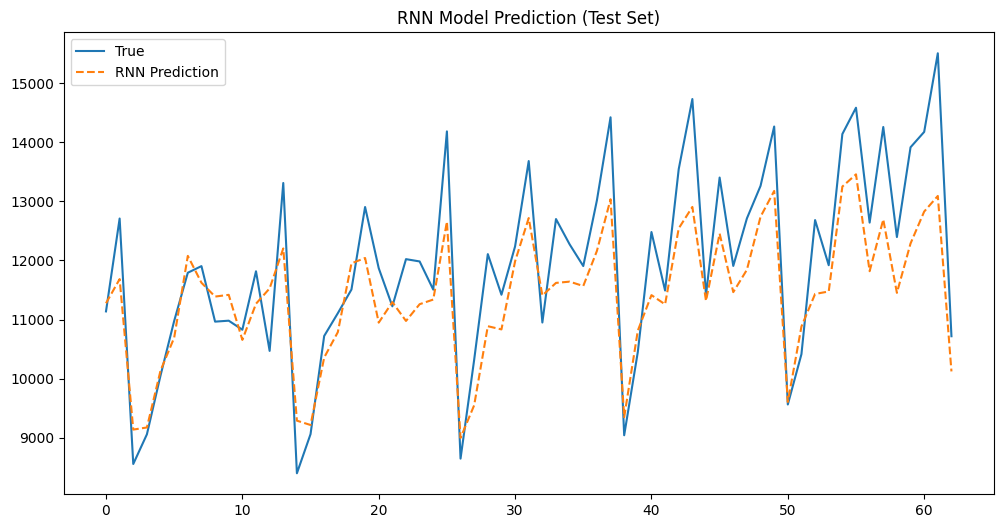

In [48]:
# 6-1. RNN 예측 시각화
plt.figure(figsize=(12, 6))
plt.title('RNN Model Prediction (Test Set)')
plt.plot(y_test_inv, label='True')
plt.plot(pred_RNN_inv, label='RNN Prediction', linestyle='--')
plt.legend()
plt.show()

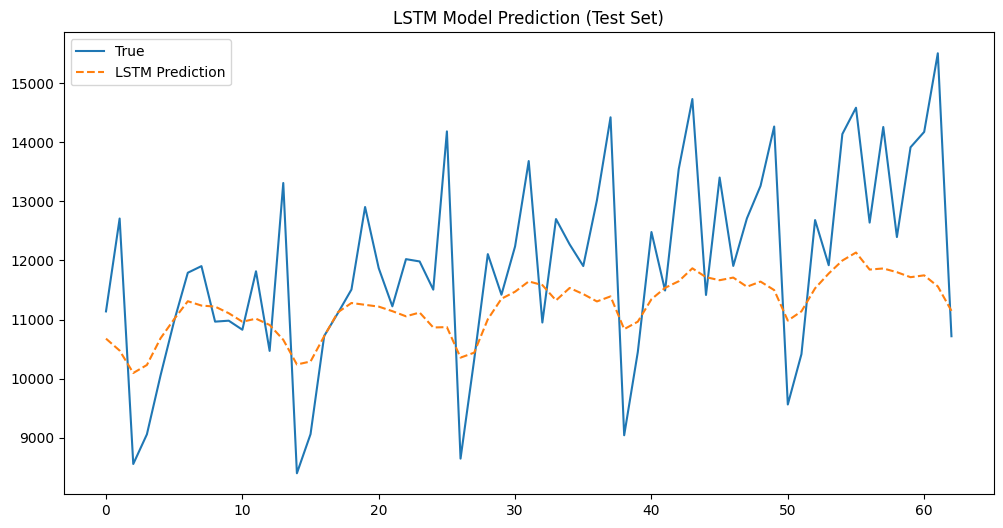

In [49]:
# 6-2. LSTM 예측 시각화
plt.figure(figsize=(12, 6))
plt.title('LSTM Model Prediction (Test Set)')
plt.plot(y_test_inv, label='True')
plt.plot(pred_LSTM_inv, label='LSTM Prediction', linestyle='--')
plt.legend()
plt.show()

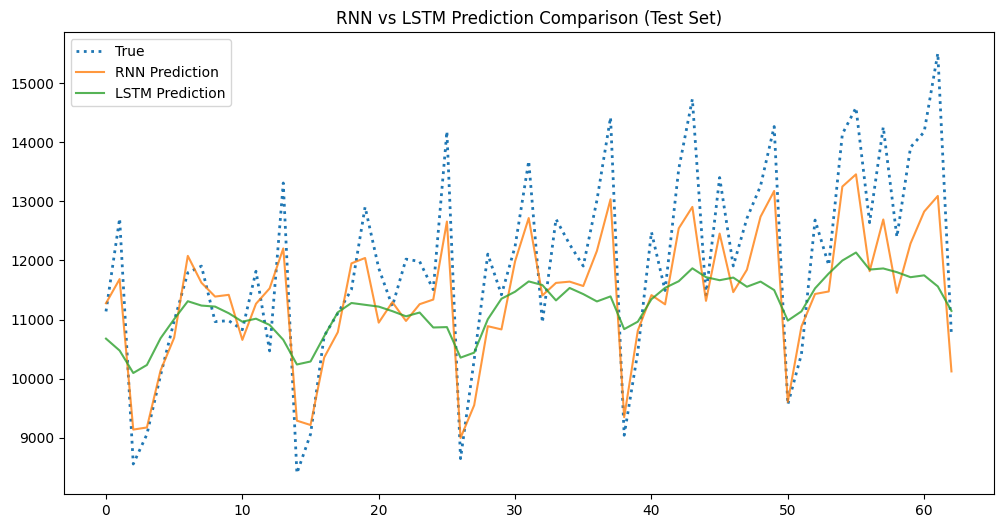

In [50]:
# 6-3. RNN vs LSTM 비교 시각화
plt.figure(figsize=(12, 6))
plt.title('RNN vs LSTM Prediction Comparison (Test Set)')
plt.plot(y_test_inv, label='True', linewidth=2, linestyle=':')
plt.plot(pred_RNN_inv, label='RNN Prediction', alpha=0.8)
plt.plot(pred_LSTM_inv, label='LSTM Prediction', alpha=0.8)
plt.legend()
plt.show()